In [ ]:
import argparse

In [ ]:
parser = argparse.ArgumentParser(description='Normalisation with scran')
parser.add_argument('-i', '--input_file', required=True)
parser.add_argument('-o', '--output_file', required=True)
args = parser.parse_args()

In [2]:
#input_file = args.input_file
#output_file = args.output_file
input_file = "/storage/groups/ml01/workspace/group.daniela/MCA/Lung.h5ad"
output_file = "/storage/groups/ml01/workspace/group.daniela/MCA/Lung_norm.h5ad"

# Normalisation

In [1]:
import pandas as pd
import scanpy as sc
import scIB

In [3]:
adata = sc.read(input_file, cache=True)

In [4]:
scIB.preprocessing.normalize(adata)

/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/icb/

In [5]:
adata.write(output_file)

## Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
adata

AnnData object with n_obs × n_vars = 6940 × 34749 
    obs: 'batch', 'tissue', 'barcode', 'cell_type', 'marker_gene', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'size_factors'
    uns: 'tissue_colors', 'cell_type_colors'
    layers: 'counts'

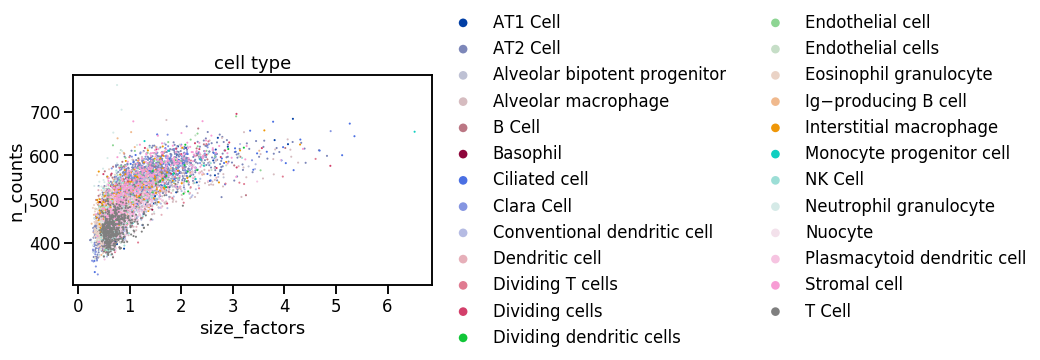

In [9]:
sc.pl.scatter(adata, 'size_factors', 'n_counts', color='cell_type')

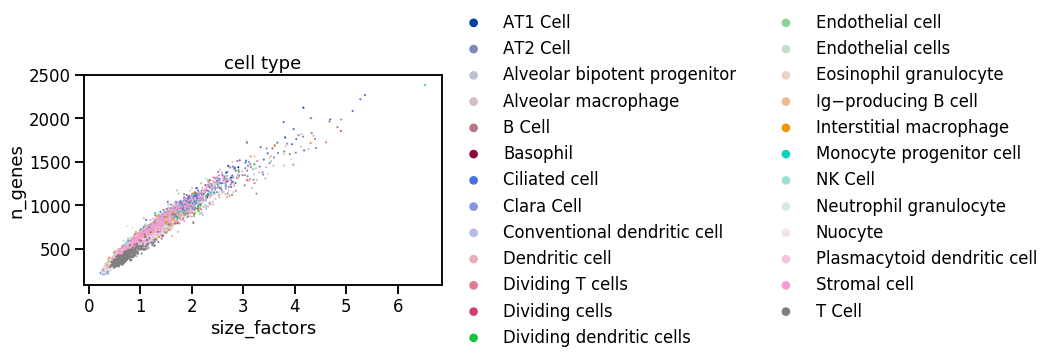

In [10]:
sc.pl.scatter(adata, 'size_factors', 'n_genes', color='cell_type')

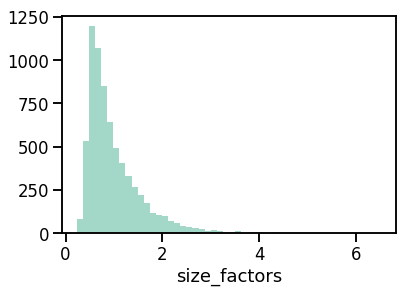

In [8]:
sns.distplot(adata.obs['size_factors'], bins=50, kde=False)
plt.show()